In [202]:
%matplotlib inline
from simulation import *
from scipy.special import comb
import numpy as np

In [203]:
def findSet2(myG,myCenterNode,myMaxDeg):
    
    curSet = set()
    curDeg = myMaxDeg
    while(curDeg>0):
        tempoSet = set(findNeighDegN(myG,myCenterNode,curDeg))
        curSet = curSet.union(tempoSet)
        curDeg -= 1
    return curSet

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [221, 182, 260, 360, 37, 242, 383, 481, 271, 180, 213, 177, 111, 110, 55, 19, 32, 449, 494, 481, 210, 84, 75, 423, 25, 263, 264, 451, 384, 68, 9, 13, 96, 251, 491, 224, 102, 133, 465, 328, 245, 457, 371, 172, 401, 157, 21, 373, 100, 453] 
Slist :  [318]


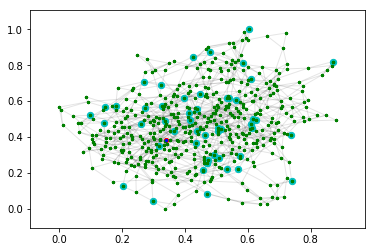

Starting infection


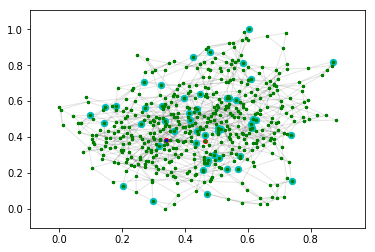

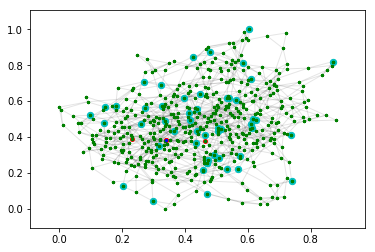

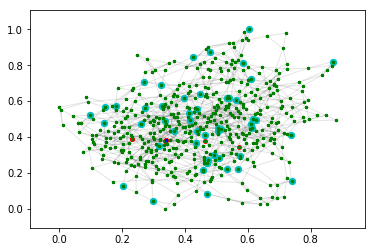

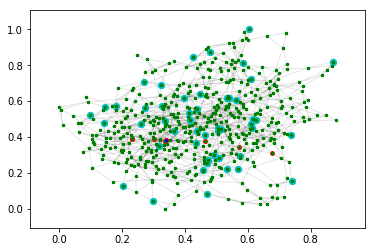

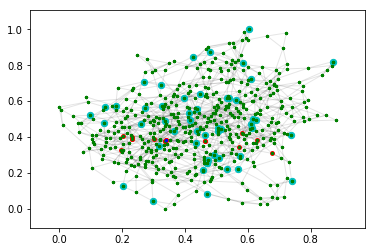

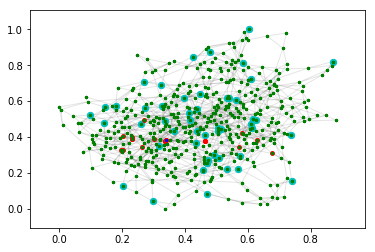

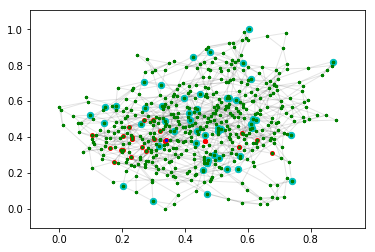

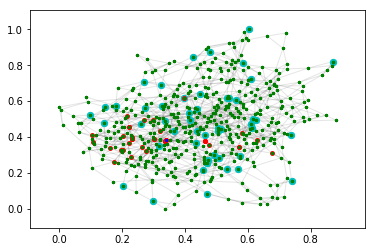

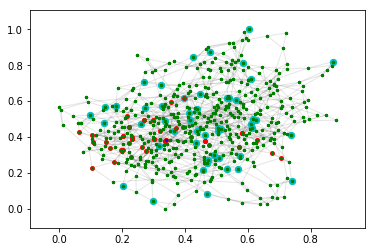

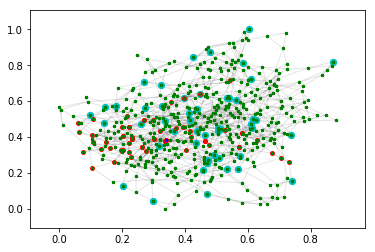

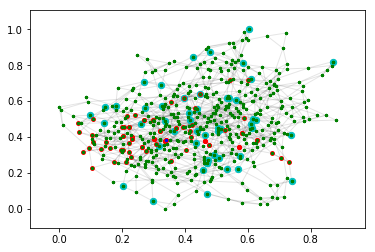

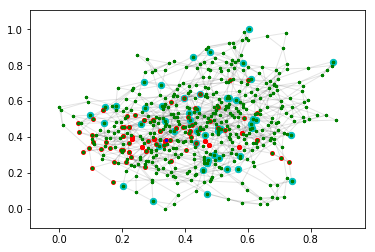

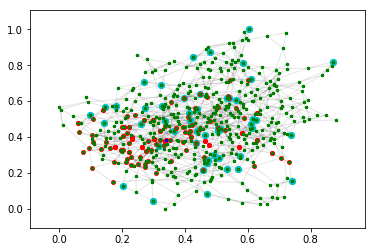

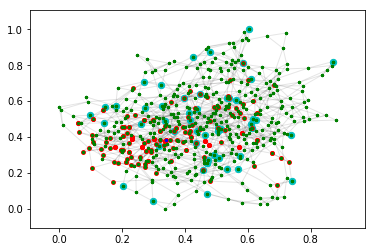

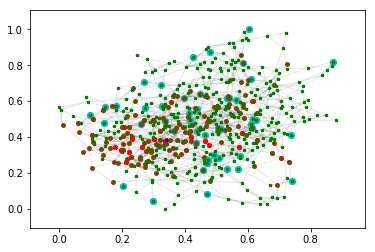

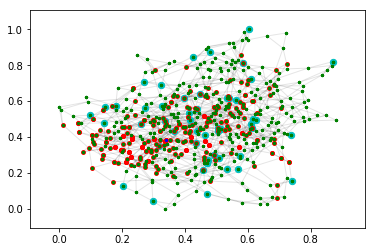

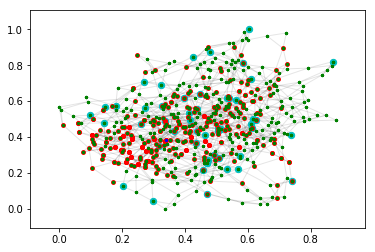

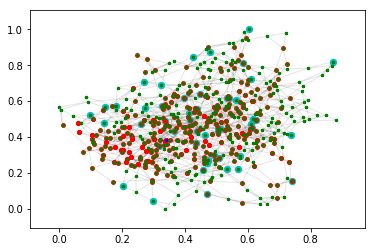

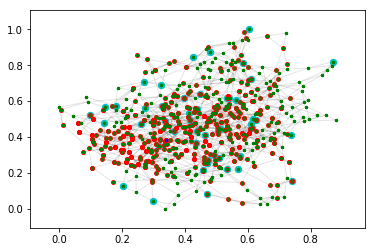

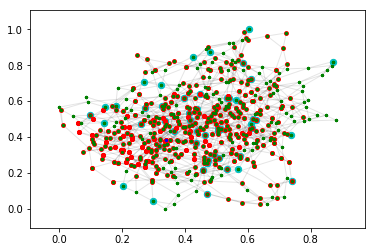

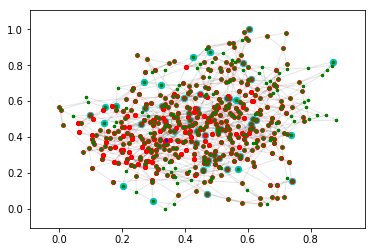

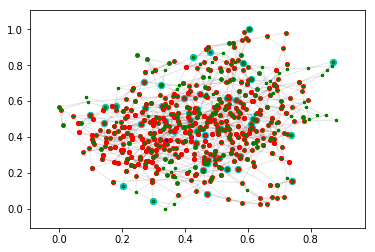

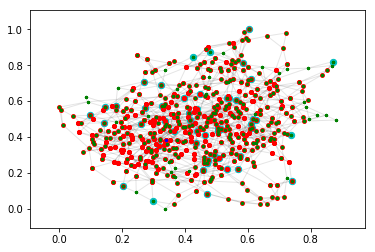

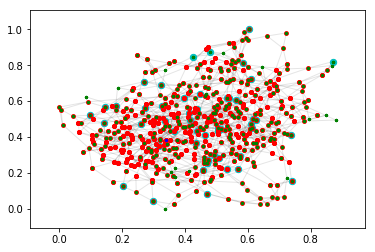

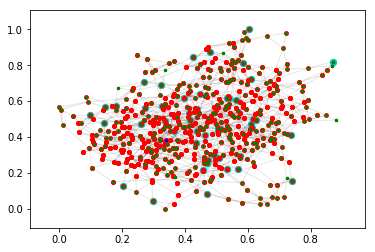

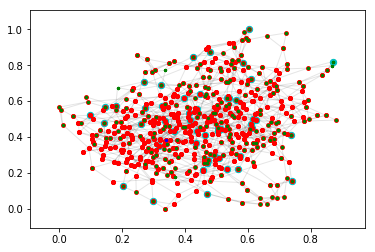

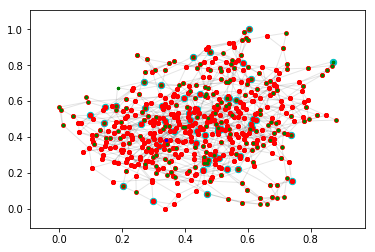

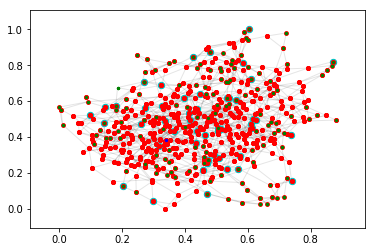

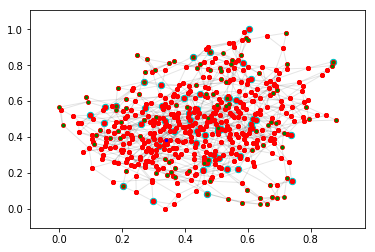

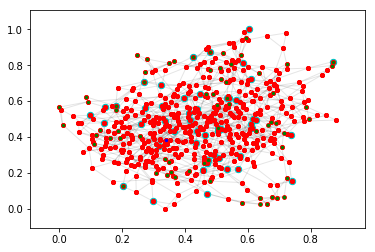

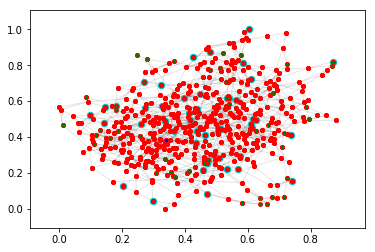

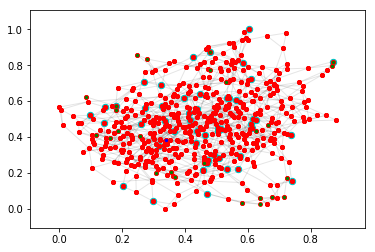

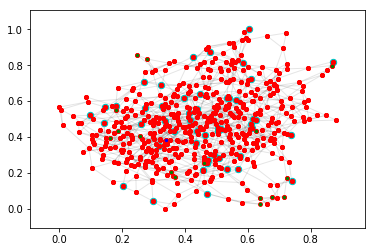

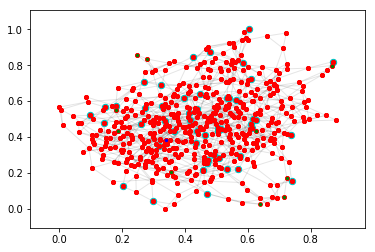

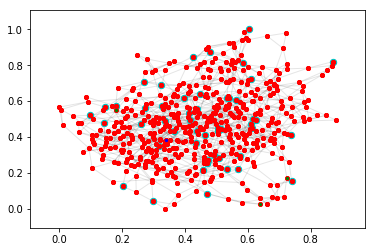

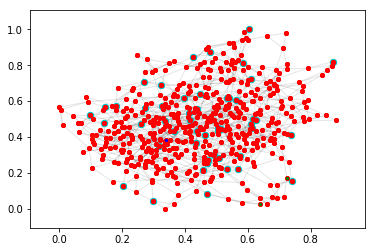

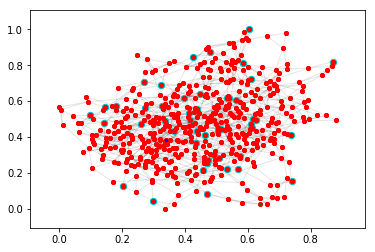

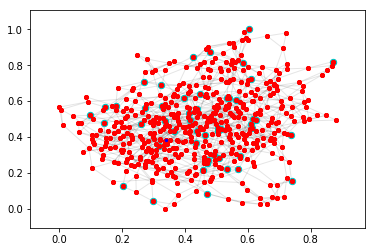

In [207]:
figureList = list()
# Parameters definition
numRumors = 3
maxThreshold = 1
numMonitors = 50
propagProba = 0.2
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100


j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')

print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)

In [209]:
# Test with simple circle intersections

sets = list()
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))
for i in range(int(len(monitorTrigger2)/numRumors)):
    set1 =findSet(Graph,monitorTrigger2[i*numRumors][0],monitorTrigger2[i*numRumors][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No single sources identified")
    #printMonitorTrig(monitorTrigger)
    #print('\n\nDifferent sets')
    #print(*sets,sep='\n')

Real Source =  318
No single sources identified


Real Source =  318
Detected Source =  [0, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 101, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 181, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243,

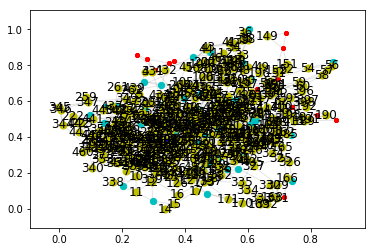

In [210]:
# Test with sets of nodes intersections
setList = []


for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

In [212]:
degCent = nx.degree_centrality(Graph)

maxDeg = -1
maxNode = -1

for node in finalList :
    if degCent[node] > maxDeg :
        maxDeg = degCent[node]
        maxNode = node
    #print(node,' : ',degCent[node])

print('\n Max degree Centrality : \n node ',maxNode,' : ', maxDeg)


 Max degree Centrality : 
 node  45  :  0.014028056112224447


In [213]:
print('Monitors : ',monitorsList,'\n\n')

pathDict = {}

for source in finalList :
    #print('\n source : ',source,': \n')
    tempoDict = {}
    for target in monitorsList :
        #print(target,' : ',len(nx.shortest_path(Graph,source,target))-1)
        tempoDict[target] = len(nx.shortest_path(Graph,source,target))-1
    pathDict[source] =  tempoDict

Monitors :  [221, 182, 260, 360, 37, 242, 383, 481, 271, 180, 213, 177, 111, 110, 55, 19, 32, 449, 494, 481, 210, 84, 75, 423, 25, 263, 264, 451, 384, 68, 9, 13, 96, 251, 491, 224, 102, 133, 465, 328, 245, 457, 371, 172, 401, 157, 21, 373, 100, 453] 




In [214]:
realSourceDict = {}
for i in range(int(len(monitorTrigger2)/numRumors)):
    #print('Monitor node : ', monitorTrigger2[i*numRumors][0],' path : ',monitorTrigger2[i*numRumors][2])
    realSourceDict[monitorTrigger2[i*numRumors][0]] = monitorTrigger2[i*numRumors][2]

In [215]:
#Work on the markov chain like propag
A = nx.adjacency_matrix(Graph).todense()

#refactor A w/ the correct probability

A = A*propagProba/4
I = np.identity(A.shape[0])*(1-propagProba)
A = A+I

In [216]:
print(monitorTrigger2)

[(9, 3, 23), (9, 2, 25), (9, 1, 31), (13, 3, 24), (13, 1, 25), (13, 2, 27), (19, 3, 13), (19, 1, 22), (19, 2, 25), (21, 3, 12), (21, 1, 21), (21, 2, 26), (25, 3, 15), (25, 1, 24), (25, 2, 24), (32, 3, 14), (32, 2, 26), (32, 1, 27), (37, 3, 21), (37, 2, 27), (37, 1, 29), (55, 1, 28), (55, 3, 28), (55, 2, 33), (68, 1, 14), (68, 2, 16), (68, 3, 25), (75, 3, 10), (75, 1, 17), (75, 2, 20), (84, 1, 17), (84, 3, 18), (84, 2, 26), (96, 3, 15), (96, 1, 17), (96, 2, 17), (100, 3, 20), (100, 2, 24), (100, 1, 28), (102, 3, 17), (102, 1, 24), (102, 2, 26), (110, 2, 25), (110, 3, 25), (110, 1, 31), (111, 2, 25), (111, 3, 27), (111, 1, 33), (133, 3, 19), (133, 1, 21), (133, 2, 23), (157, 3, 20), (157, 1, 24), (157, 2, 24), (172, 3, 17), (172, 2, 22), (172, 1, 30), (177, 3, 17), (177, 1, 21), (177, 2, 23), (180, 3, 18), (180, 1, 25), (180, 2, 26), (182, 3, 16), (182, 1, 25), (182, 2, 28), (210, 3, 24), (210, 2, 27), (210, 1, 28), (213, 3, 21), (213, 1, 26), (213, 2, 26), (221, 3, 19), (221, 2, 21), (2

In [217]:
def calculProba(myPropagProba,myDist,mySteps):
    p = myPropagProba
    k = myDist
    n = mySteps
    result = 0
    for i in range(0,n-k+1):
        result += comb(k+i-1,i, exact=True) * pow(p,k) * pow(1-p,i)
    return result

In [218]:
sourceDict ={}

for source in finalList:
    sourceDict[source] = 0


for mInfo in monitorTrigger2:
    #print("Monitor ",mInfo[0]," :")
    for source in finalList:
        prb = calculProba(propagProba,len(nx.shortest_path(Graph,source,mInfo[0]))-1,mInfo[2])
        sourceDict[source]+=prb
        #print("Infected by node ",source," with proba : ",prb)

In [219]:
scoreList = sorted(sourceDict,key=sourceDict.__getitem__,reverse=True)
#print(sourceDict)
print(scoreList)
print("position of the real source :", scoreList.index(*rumorSources)+1)
print("number of candidates : ",len(scoreList))

[130, 247, 495, 65, 269, 246, 258, 244, 214, 23, 140, 8, 454, 308, 361, 64, 174, 81, 452, 212, 279, 28, 63, 132, 86, 270, 141, 379, 139, 283, 275, 336, 268, 67, 285, 217, 6, 66, 435, 92, 363, 281, 129, 207, 124, 211, 131, 79, 121, 267, 116, 26, 243, 208, 380, 436, 364, 24, 450, 417, 304, 301, 464, 119, 122, 61, 27, 7, 62, 117, 216, 209, 118, 120, 215, 434, 173, 408, 381, 490, 392, 499, 282, 181, 77, 357, 284, 349, 406, 94, 497, 123, 228, 343, 99, 425, 359, 142, 128, 393, 413, 272, 266, 277, 309, 273, 394, 83, 95, 138, 426, 256, 335, 115, 323, 97, 229, 365, 356, 51, 257, 90, 241, 378, 306, 310, 389, 327, 470, 498, 433, 143, 483, 489, 227, 53, 303, 352, 496, 300, 5, 87, 59, 76, 388, 337, 339, 12, 265, 471, 355, 101, 85, 412, 492, 456, 391, 80, 29, 307, 240, 312, 448, 89, 88, 4, 455, 154, 377, 199, 313, 50, 474, 469, 405, 354, 374, 341, 385, 386, 248, 186, 348, 183, 22, 93, 91, 137, 311, 10, 206, 158, 480, 176, 175, 156, 48, 274, 127, 98, 278, 438, 358, 375, 218, 419, 147, 382, 287, 326, 

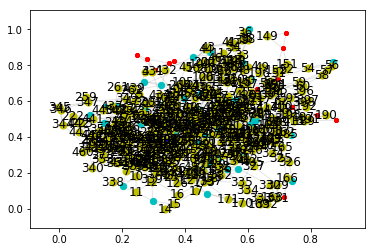

In [220]:
fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)

In [221]:
print("Distance between first candidate and real source : ",len(nx.shortest_path(Graph,rumorSources[0],scoreList[0]))-1)
print("Average distance : ",nx.average_shortest_path_length(Graph))

Distance between first candidate and real source :  6


Average distance :  6.05903006012024


In [222]:
#Convert dict of dict into dict of array for all possible sources

bigKeys = pathDict.keys()
pathDict2= {}
for i in bigKeys:
    smallKeys = sorted(pathDict[i].keys())
    tempo=[]
    for j in smallKeys:
        tempo.append(pathDict[i][j])
        pathDict2[i]= np.asarray(tempo)

In [223]:
keys = sorted(realSourceDict.keys())
tempo=[]
for k in keys :
    tempo.append(realSourceDict[k])

realSourceArray = np.asarray(tempo)

In [224]:
print(realSourceDict)
print(realSourceArray)

{9: 23, 13: 24, 19: 13, 21: 12, 25: 15, 32: 14, 37: 21, 55: 28, 68: 14, 75: 10, 84: 17, 96: 15, 100: 20, 102: 17, 110: 25, 111: 25, 133: 19, 157: 20, 172: 17, 177: 17, 180: 18, 182: 16, 210: 24, 213: 21, 221: 19, 224: 22, 242: 20, 245: 20, 251: 17, 260: 23, 263: 22, 264: 22, 271: 23, 328: 17, 360: 15, 371: 19, 373: 22, 383: 22, 384: 19, 401: 20, 423: 13, 449: 14, 451: 19, 453: 16, 457: 8, 465: 15, 481: 19, 491: 18, 494: 12}
[23 24 13 12 15 14 21 28 14 10 17 15 20 17 25 25 19 20 17 17 18 16 24 21 19
 22 20 20 17 23 22 22 23 17 15 19 22 22 19 20 13 14 19 16  8 15 19 18 12]


In [225]:
bestSource = -1
bestScore = 10000000

normList = []

for k in pathDict2 :
    
    print("Candidate : ",k," norm : ",np.linalg.norm(pathDict2[k]-realSourceArray))
    normList.append((k,np.linalg.norm(pathDict2[k]-realSourceArray)))
    
    if np.linalg.norm(pathDict2[k]-realSourceArray) < bestScore :
        bestScore = np.linalg.norm(pathDict2[k]-realSourceArray)
        bestSource = k

print("\nBest Candidate : ",bestSource)
print("Real Source : ", rumorSources)

Candidate :  0  norm :  89.2636544177
Candidate :  3  norm :  90.5096679919
Candidate :  4  norm :  92.6282894153
Candidate :  5  norm :  93.1450481776
Candidate :  6  norm :  95.0894315894
Candidate :  7  norm :  94.4086860411
Candidate :  8  norm :  96.2185013394
Candidate :  10  norm :  92.0923449587
Candidate :  11  norm :  89.7663634108
Candidate :  12  norm :  93.2684298142
Candidate : 

 14  norm :  85.3346354067
Candidate :  15  norm :  86.1742420912
Candidate :  16  norm :  88.9100669216
Candidate :  17  norm :  86.6256313108
Candidate :  18  norm :  89.7385090137
Candidate :  20  norm :  90.1387818866
Candidate :  22  norm :  91.3345498702
Candidate :  23  norm :  95.7392291592
Candidate :  24  norm :  93.9574371724
Candidate :  26  norm :  94.5568612
Candidate :  27  norm :  93.5093578205
Candidate :  28  norm :  95.2627944163
Candidate :  29  norm :  91.6187753684
Candidate :  30  norm :  86.8274150254
Candidate :  31  norm :  89.6102672689
Candidate :  33  norm :  84.9941174435
Candidate :  34  norm :  85.7962703152
Candidate :  35  norm :  82.0243866176
Candidate :  36  norm :  81.6700679564
Candidate :  38  norm :  81.7129120764
Candidate :  39  norm :  81.859635963
Candidate :  40  norm :  86.6198591548
Candidate :  41  norm :  83.7854402626
Candidate :  42  norm :  84.5458455514
Candidate :  43  norm :  85.9418407995
Candidate :  44  norm :  87.0976463517
Ca

Candidate :  106  norm :  91.1592014006
Candidate :  107  norm :  89.8331787259
Candidate :  108  norm :  88.334591186
Candidate :  109  norm :  86.8446889568
Candidate :  112  norm :  88.3685464405
Candidate :  113  norm :  91.0384534139
Candidate :  114  norm :  92.6066952223
Candidate :  115  norm :  95.0736556571
Candidate :  116  norm :  95.7444515364
Candidate :  117  norm :  95.2942810456
Candidate :  118  norm :  94.8367017562
Candidate :  119  norm :  94.5780101292
Candidate :  120  norm :  94.281493412
Candidate :  121  norm :  95.0263121456
Candidate :  122  norm :  94.7048045244
Candidate :  123  norm :  93.7976545549
Candidate :  124  norm :  95.2417975471
Candidate :  125  norm :  89.2132277188
Candidate :  126  norm :  89.554452709
Candidate :  127  norm :  92.6552750792
Candidate :  128  norm :  94.3345111823
Candidate :  129  norm :  95.859271852
Candidate :  130  norm :  99.3126376651
Candidate :  131  norm :  95.9895827681
Candidate :  132  norm :  96.6591951136
Cand

In [226]:
normList = sorted(normList, key=lambda x : x[1])

print(sorted(normList, key=lambda x : x[1]))
print("\n",scoreList)

[(149, 80.665977958492519), (291, 81.16033513977132), (36, 81.670067956381672), (38, 81.712912076366493), (39, 81.859635963031252), (35, 82.024386617639507), (169, 83.138438763306112), (151, 83.252627586160912), (293, 83.336666600002673), (290, 83.600239234107462), (41, 83.785440262613648), (168, 84.077345343439575), (166, 84.190260719396747), (292, 84.303024856763003), (42, 84.545845551393001), (72, 84.63450832845902), (33, 84.994117443503114), (460, 85.31705573916625), (14, 85.334635406732716), (235, 85.37564055396598), (294, 85.673799962415586), (236, 85.790442358108862), (34, 85.796270315206598), (43, 85.941840799461588), (232, 86.110394262249201), (295, 86.145226217127089), (15, 86.174242091242093), (192, 86.209048249009228), (338, 86.209048249009228), (340, 86.220647179199489), (237, 86.475430036513842), (71, 86.510115015528669), (40, 86.619859154815074), (17, 86.625631310830855), (297, 86.706401147781477), (318, 86.740993768805765), (30, 86.827415025439976), (109, 86.84468895678

In [227]:
normList2 = [ v[0] for v in normList]

print(normList2)

classmentDict = {}

for i in normList2 :
    classmentDict[i] = normList2.index(i) + scoreList.index(i)
    
print("\n", sorted(classmentDict,key=classmentDict.__getitem__))

[149, 291, 36, 38, 39, 35, 169, 151, 293, 290, 41, 168, 166, 292, 42, 72, 33, 460, 14, 235, 294, 236, 34, 43, 232, 295, 15, 192, 338, 340, 237, 71, 40, 17, 297, 318, 30, 109, 398, 196, 316, 332, 288, 459, 44, 190, 163, 442, 443, 317, 441, 233, 397, 74, 160, 484, 170, 198, 439, 195, 331, 437, 203, 194, 234, 344, 152, 461, 345, 69, 333, 191, 56, 320, 108, 165, 112, 230, 255, 475, 193, 396, 73, 289, 420, 368, 16, 238, 476, 254, 409, 201, 351, 52, 153, 319, 400, 399, 46, 162, 125, 0, 171, 422, 185, 468, 315, 187, 444, 440, 407, 445, 486, 126, 178, 31, 155, 478, 286, 314, 18, 11, 252, 466, 329, 458, 376, 421, 107, 296, 249, 410, 57, 223, 82, 54, 370, 299, 200, 321, 70, 482, 20, 350, 184, 462, 472, 202, 146, 204, 239, 353, 431, 411, 159, 305, 395, 342, 477, 487, 3, 346, 322, 485, 58, 104, 78, 276, 324, 205, 135, 225, 330, 367, 105, 298, 47, 189, 334, 424, 179, 222, 219, 231, 467, 469, 432, 144, 113, 197, 287, 479, 45, 369, 404, 220, 280, 446, 106, 226, 161, 302, 471, 259, 145, 136, 325, 473,